In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [237]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [239]:
# Checking for missing Value
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and missing value
The dataset has missing value

In [240]:
# Checking if Reviews colum has numeric numbers
df['Reviews'].str.isnumeric().sum()

10840

In [241]:
# Checking the not numeric value of Review
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## Data Cleaning


In [242]:
df_copy = df.copy()

In [243]:
df_copy = df_copy.drop(df_copy.index[10472])

In [244]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [245]:
# Converting Reviews dtype to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [246]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [247]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [248]:
df_copy['Size']= df_copy['Size'].str.replace('M','000')
df_copy['Size']= df_copy['Size'].str.replace('k','')
df_copy['Size']= df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size'] = df_copy['Size'].replace('', np.nan)
df_copy['Size']= df_copy['Size'].astype(float)

In [249]:
df_copy[df_copy['Size'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


<Axes: xlabel='Size', ylabel='Count'>

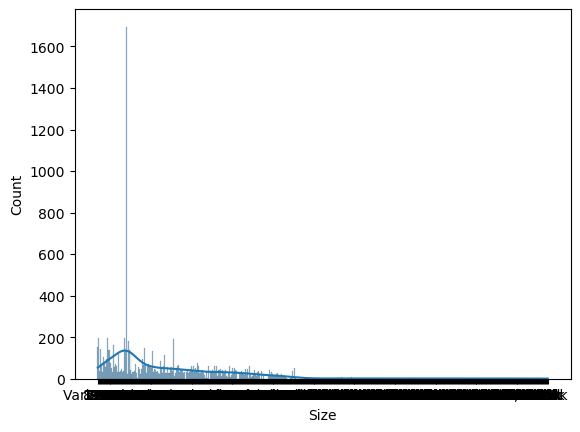

In [250]:
sns.histplot(df['Size'], kde=True)

In [251]:
skewness_value = df_copy['Size'].skew()
skewness_value

1.3893643167906349

As the Column 'Size' is right skewed (Positive Skewness) we'll use median to replace nan with median

In [252]:
df_copy['Size'] = df_copy['Size'].fillna(df_copy['Size'].median())

In [253]:
df_copy['Size'].isnull().sum()

0

In [254]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [255]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [256]:
char_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for items in char_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(items,'')

In [257]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [258]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [259]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [260]:
df_copy['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [261]:
df_copy['Type'].mode()

0    Free
Name: Type, dtype: object

In [262]:
df_copy['Type'] = df_copy['Type'].fillna(df_copy['Type'].mode()[0])

In [263]:
df_copy['Type'].isnull().sum()

0

In [264]:
df_copy['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [265]:
from sklearn.preprocessing import OneHotEncoder

In [266]:
encoder = OneHotEncoder()

In [267]:
encoder.fit_transform(df_copy[['Type']]).toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [268]:
encoded_df_copy = pd.DataFrame(encoder.fit_transform(df_copy[['Type']]).toarray(),columns=encoder.get_feature_names_out())

In [269]:
df_copy = pd.concat([df_copy,encoded_df_copy],axis=1)

In [270]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.0,0.0


In [271]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10472
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Type_Free       10840 non-null  float64
 14  Type_Paid       10840 non-null  float64
dtypes: float64(7), object(8)
memory usage: 1.3+ MB


In [272]:
df_copy['Category'].isnull().sum()

1

In [273]:
df_copy['Category'].mode()

0    FAMILY
Name: Category, dtype: object

In [274]:
df_copy['Category'] = df_copy['Category'].fillna(df_copy['Category'].mode()[0])

In [275]:
df_copy['Category'].isnull().sum()

0

In [276]:
df_copy['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [277]:
encoder = OneHotEncoder()

In [278]:
encoder.fit_transform(df_copy[['Category']]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [279]:
encoded_df_copy = pd.DataFrame(encoder.fit_transform(df_copy[['Category']]).toarray(),columns=encoder.get_feature_names_out())

In [280]:
df_copy = pd.concat([df_copy,encoded_df_copy],axis=1)

In [281]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10472
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   App                           10840 non-null  object 
 1   Category                      10841 non-null  object 
 2   Rating                        9366 non-null   float64
 3   Reviews                       10840 non-null  float64
 4   Size                          10840 non-null  float64
 5   Installs                      10840 non-null  float64
 6   Type                          10840 non-null  object 
 7   Price                         10840 non-null  float64
 8   Content Rating                10840 non-null  object 
 9   Genres                        10840 non-null  object 
 10  Last Updated                  10840 non-null  object 
 11  Current Ver                   10832 non-null  object 
 12  Android Ver                   10838 non-null  object 
 13  Type_F

In [283]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'February 16, 2014', 'March 23, 2014', nan], dtype=object)

In [284]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Date']= df_copy['Last Updated'].dt.day
df_copy['Month']= df_copy['Last Updated'].dt.month
df_copy['Year']= df_copy['Last Updated'].dt.year

In [285]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10472
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   App                           10840 non-null  object        
 1   Category                      10841 non-null  object        
 2   Rating                        9366 non-null   float64       
 3   Reviews                       10840 non-null  float64       
 4   Size                          10840 non-null  float64       
 5   Installs                      10840 non-null  float64       
 6   Type                          10840 non-null  object        
 7   Price                         10840 non-null  float64       
 8   Content Rating                10840 non-null  object        
 9   Genres                        10840 non-null  object        
 10  Last Updated                  10840 non-null  datetime64[ns]
 11  Current Ver                   108

In [286]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Date,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,2018.0


In [287]:
df_copy['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [288]:
df_copy['Content Rating'].isnull().sum()

1

In [289]:
df_copy['Content Rating'].mode()

0    Everyone
Name: Content Rating, dtype: object

In [290]:
df_copy['Content Rating'] = df_copy['Content Rating'].fillna(df_copy['Content Rating'].mode()[0])

In [291]:
df_copy['Content Rating'].isnull().sum()

0

In [292]:
encoder = OneHotEncoder()

In [293]:
encoder.fit_transform(df_copy[['Content Rating']]).toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [294]:
encoded_df_copy = pd.DataFrame(encoder.fit_transform(df_copy[['Content Rating']]).toarray(),columns=encoder.get_feature_names_out())

In [295]:
df_copy = pd.concat([df_copy,encoded_df_copy],axis=1)

In [296]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Category_WEATHER,Date,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,...,0.0,7.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,0.0,15.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0


In [297]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10472
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   App                             10840 non-null  object        
 1   Category                        10841 non-null  object        
 2   Rating                          9366 non-null   float64       
 3   Reviews                         10840 non-null  float64       
 4   Size                            10840 non-null  float64       
 5   Installs                        10840 non-null  float64       
 6   Type                            10840 non-null  object        
 7   Price                           10840 non-null  float64       
 8   Content Rating                  10841 non-null  object        
 9   Genres                          10840 non-null  object        
 10  Last Updated                    10840 non-null  datetime64[ns]
 11  Current

In [298]:
df_copy[df_copy['App'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Category_WEATHER,Date,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
10472,NaN,FAMILY,NaN,NaN,NaN,NaN,NaN,NaN,Everyone,NaN,...,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0


In [299]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Category_WEATHER,Date,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,...,0.0,7.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,0.0,15.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0


In [300]:
df_copy[df_copy['App'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Category_WEATHER,Date,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
10472,NaN,FAMILY,NaN,NaN,NaN,NaN,NaN,NaN,Everyone,NaN,...,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0


In [301]:
df_copy = df_copy.drop(index=10472)


In [302]:
df_copy[df_copy['App'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Category_WEATHER,Date,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated


In [303]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   App                             10840 non-null  object        
 1   Category                        10840 non-null  object        
 2   Rating                          9366 non-null   float64       
 3   Reviews                         10840 non-null  float64       
 4   Size                            10840 non-null  float64       
 5   Installs                        10840 non-null  float64       
 6   Type                            10840 non-null  object        
 7   Price                           10840 non-null  float64       
 8   Content Rating                  10840 non-null  object        
 9   Genres                          10840 non-null  object        
 10  Last Updated                    10840 non-null  datetime64[ns]
 11  Current

In [304]:
df_copy.drop('Type',axis=1,inplace=True)

In [305]:
df_copy.drop('Content Rating',axis=1,inplace=True)

In [306]:
df_copy.drop('Last Updated',axis=1,inplace=True)

In [307]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   App                             10840 non-null  object 
 1   Category                        10840 non-null  object 
 2   Rating                          9366 non-null   float64
 3   Reviews                         10840 non-null  float64
 4   Size                            10840 non-null  float64
 5   Installs                        10840 non-null  float64
 6   Price                           10840 non-null  float64
 7   Genres                          10840 non-null  object 
 8   Current Ver                     10832 non-null  object 
 9   Android Ver                     10838 non-null  object 
 10  Type_Free                       10839 non-null  float64
 11  Type_Paid                       10839 non-null  float64
 12  Category_ART_AND_DESIGN         10840

In [324]:
df_copy.to_csv('Data/google_cleaned.csv')

## Perfoming EDA

In [308]:
df_copy['App'].duplicated().sum()

1181

### Observation
The Dataset has dup;ication records

In [309]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep="first")

In [310]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   App                             9659 non-null   object 
 1   Category                        9659 non-null   object 
 2   Rating                          8196 non-null   float64
 3   Reviews                         9659 non-null   float64
 4   Size                            9659 non-null   float64
 5   Installs                        9659 non-null   float64
 6   Price                           9659 non-null   float64
 7   Genres                          9659 non-null   object 
 8   Current Ver                     9651 non-null   object 
 9   Android Ver                     9657 non-null   object 
 10  Type_Free                       9658 non-null   float64
 11  Type_Paid                       9658 non-null   float64
 12  Category_ART_AND_DESIGN         9659 n

In [311]:
numeric_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype !='O']
categorical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype =='O']

print('We Have {} numerical features : {}'.format(len(numeric_feature),numeric_feature))
print('\nWe Have {} categorical features : {}'.format(len(categorical_feature),categorical_feature))

We Have 49 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Type_Free', 'Type_Paid', 'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME', 'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING', 'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL', 'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL', 'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Date', 'Month', 'Year', 'Content Rating_Adults only 18+', 'Content Rating_Everyone', 'Content Rating_E

ValueError: num must be an integer with 1 <= num <= 15, not 16

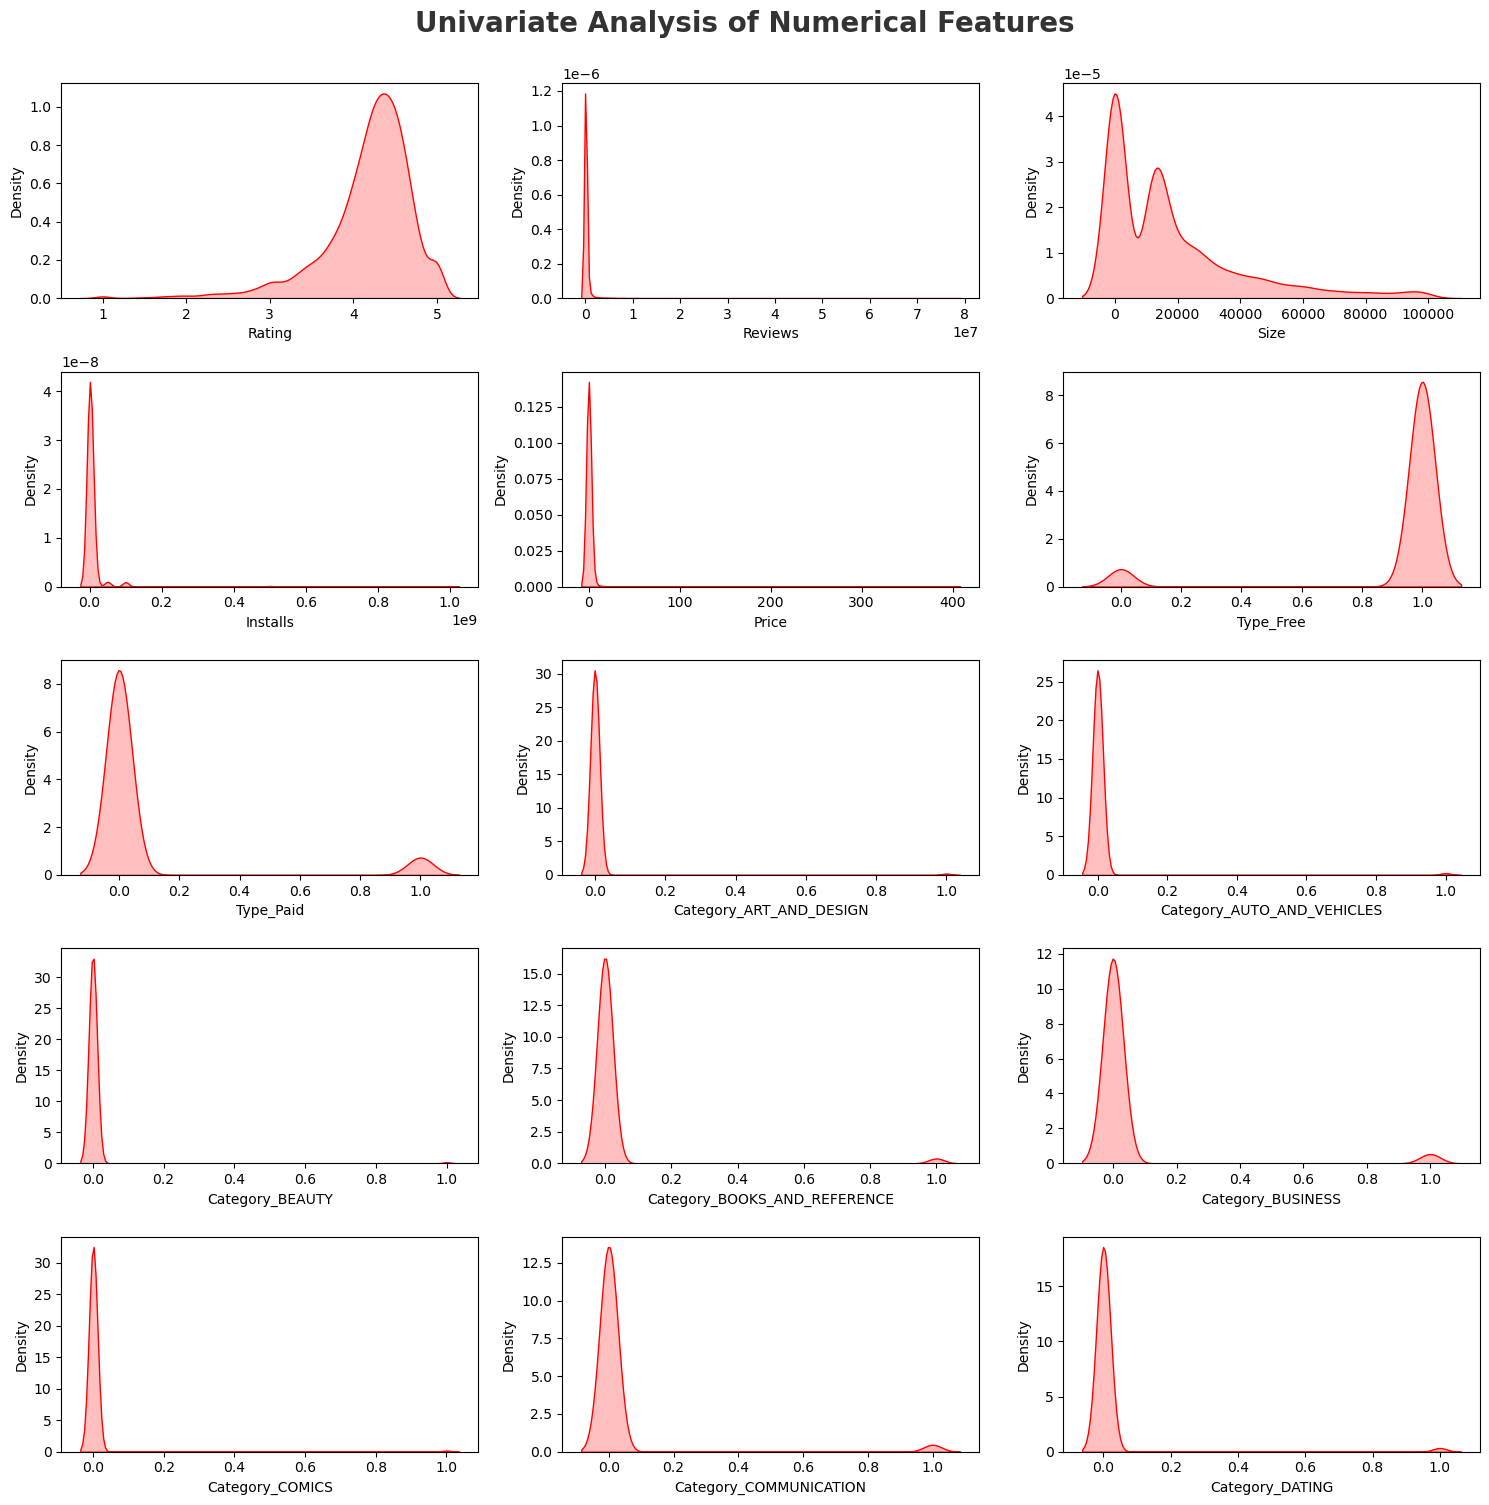

In [312]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_feature[i]],fill=True, color='r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

### Observation 
- Rating and Type_free is left skewed 
- while the others are right skewed
- Outliers might be present here.

C:\Users\taheera\AppData\Local\Temp\ipykernel_26792\3008872704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette="Set2")
C:\Users\taheera\AppData\Local\Temp\ipykernel_26792\3008872704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette="Set2")


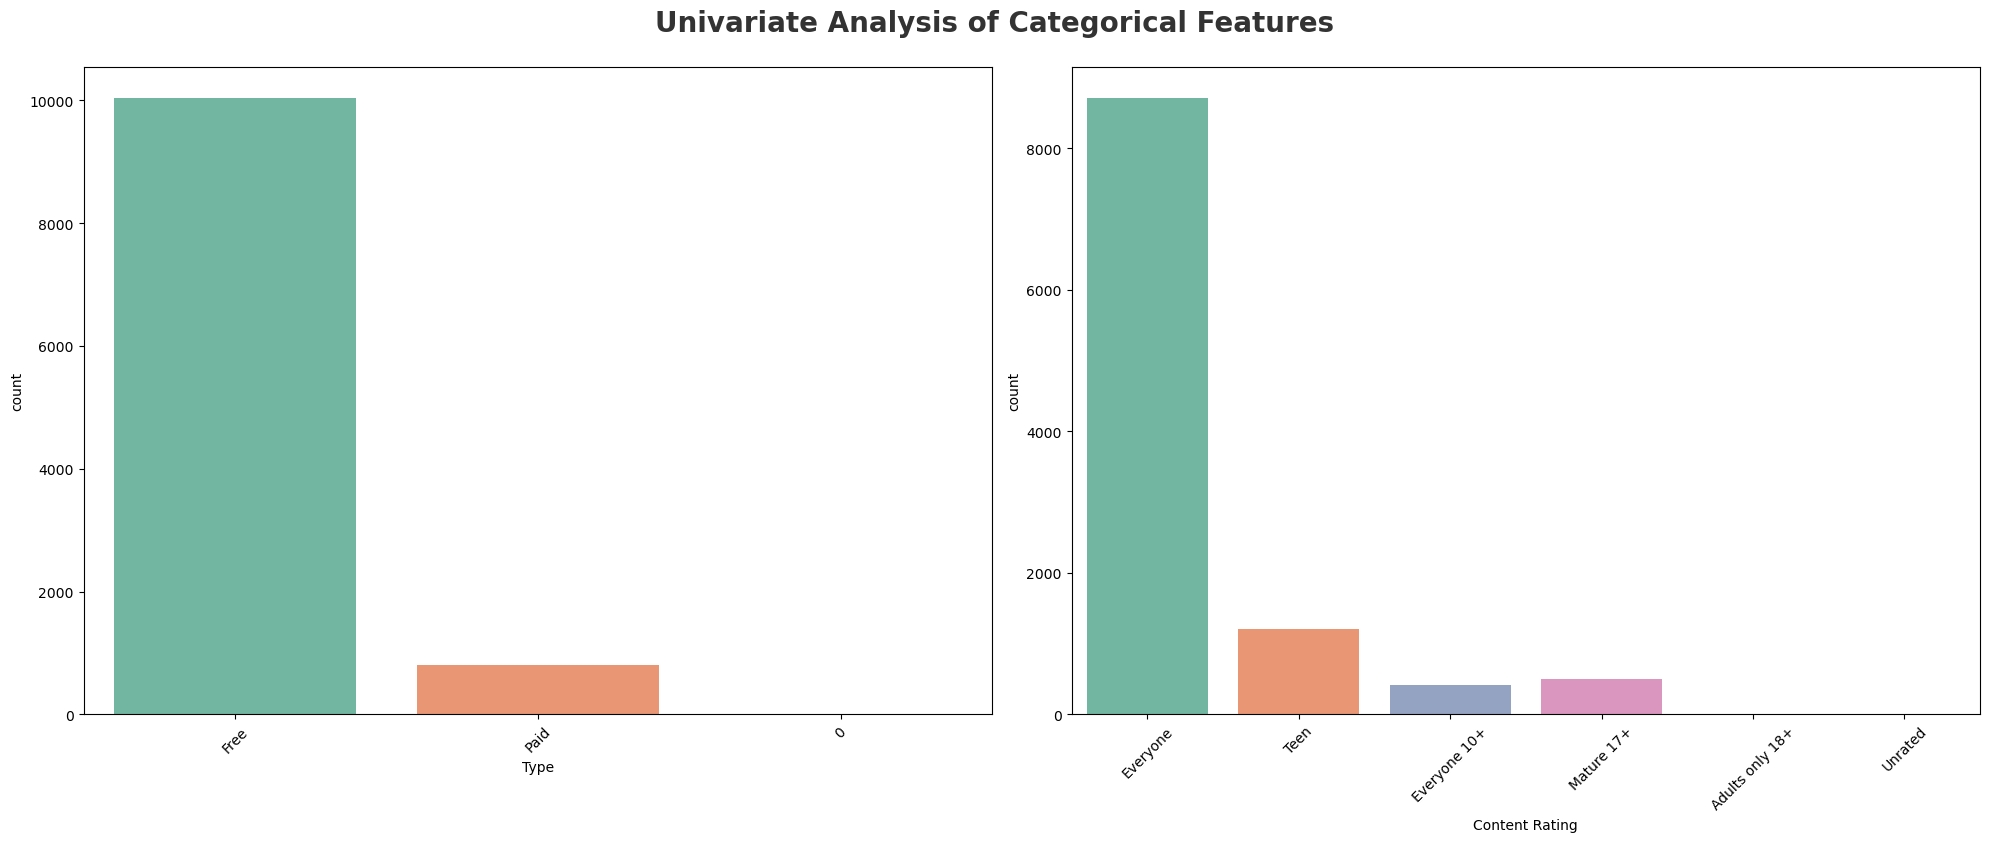

In [232]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

## Which is the most popular app category


In [233]:
df_copy.head(2)

,App,Rating,Reviews,Size,Installs,Price,Genres,Current Ver,Android Ver,Type_Free,...,Category_WEATHER,Date,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159.0,19000.0,10000.0,0.0,Art & Design,1.0.0,4.0.3 and up,1.0,...,0.0,7.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,3.9,967.0,14000.0,500000.0,0.0,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1.0,...,0.0,15.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: ylabel='count'>

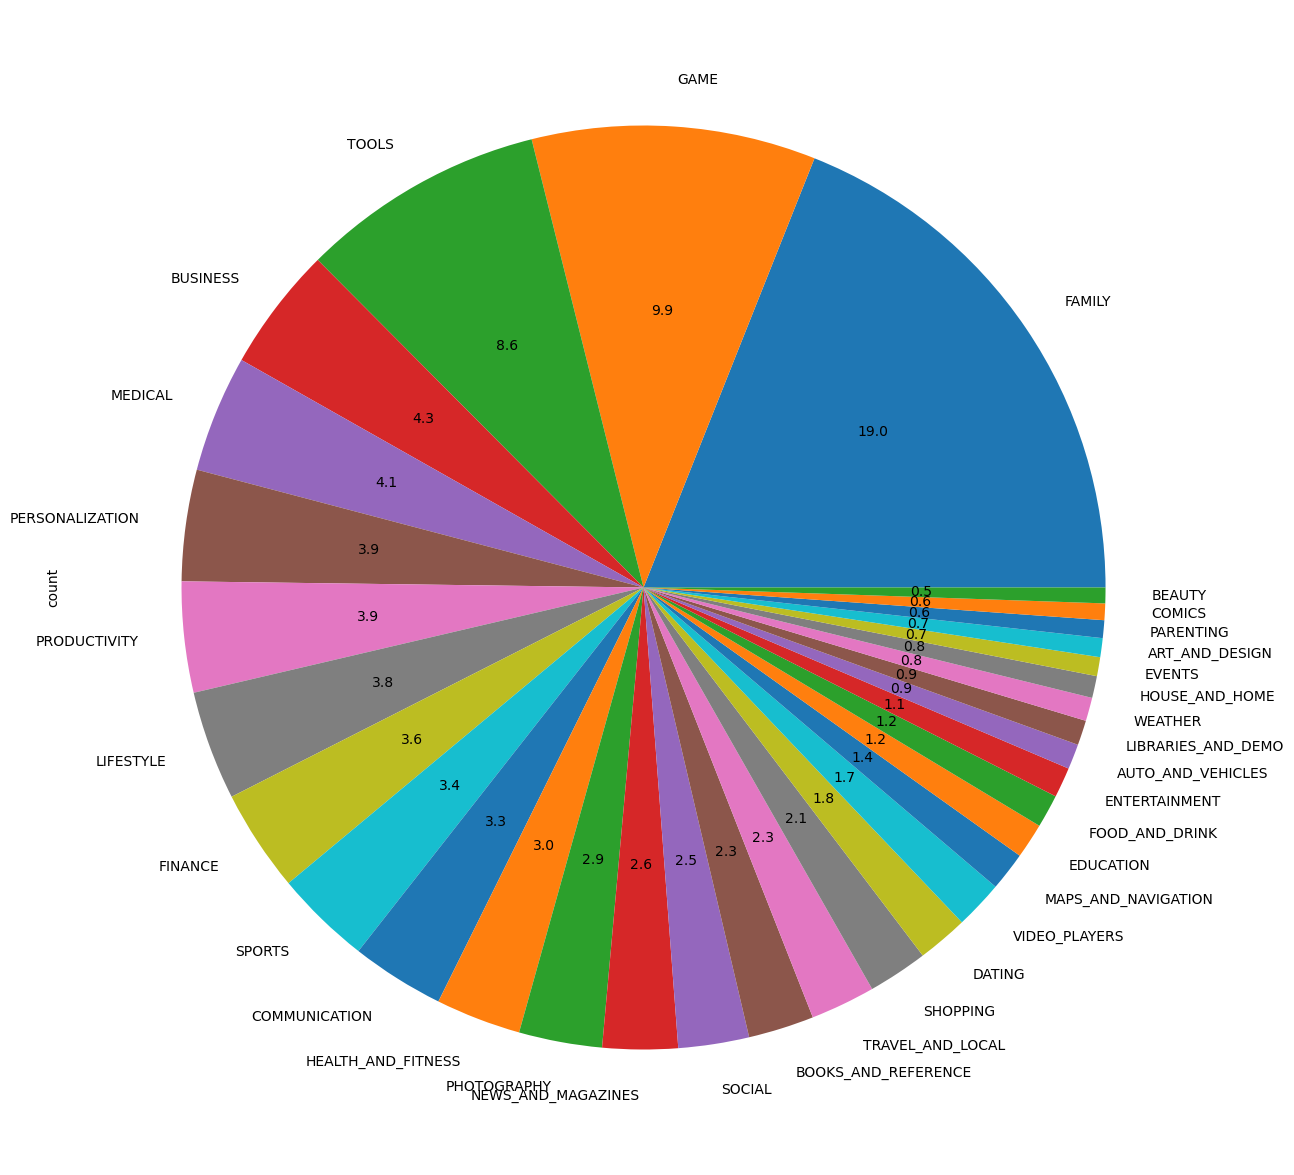

In [313]:
#Createing a Visual Representation 
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,15),autopct='%1.1f')

## Observation 
- Most kinds of apps in playstore comes under Family, Games and Tools
- Least kinds of apps in playstore are Beauty, Comics and Art_and_design

In [314]:
df_copy['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [315]:
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [316]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


C:\Users\taheera\AppData\Local\Temp\ipykernel_26792\2967503745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category.index[:10], y ='count',data = category[:10],palette='hls')


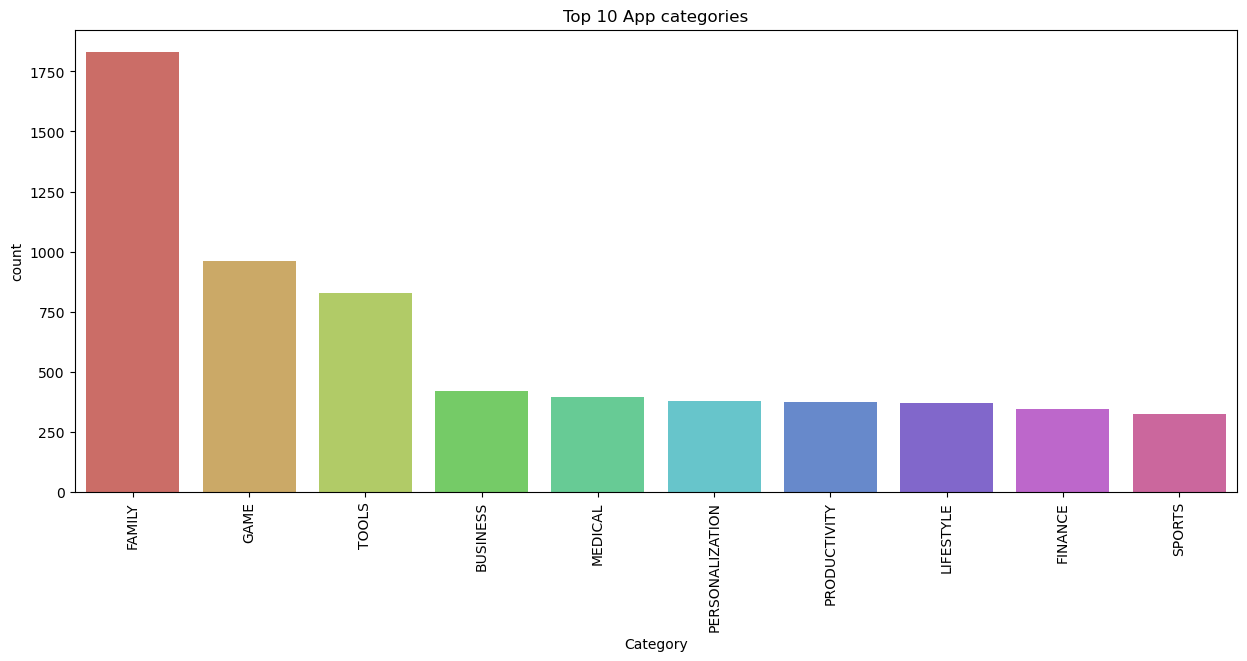

In [317]:
## Finding Top 10 Categories
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [318]:
### Largest number of installation in a category

In [319]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Current Ver,Android Ver,...,Category_WEATHER,Date,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,0.0,Art & Design,1.0.0,4.0.3 and up,...,0.0,7.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,0.0,Art & Design;Pretend Play,2.0.0,4.0.3 and up,...,0.0,15.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

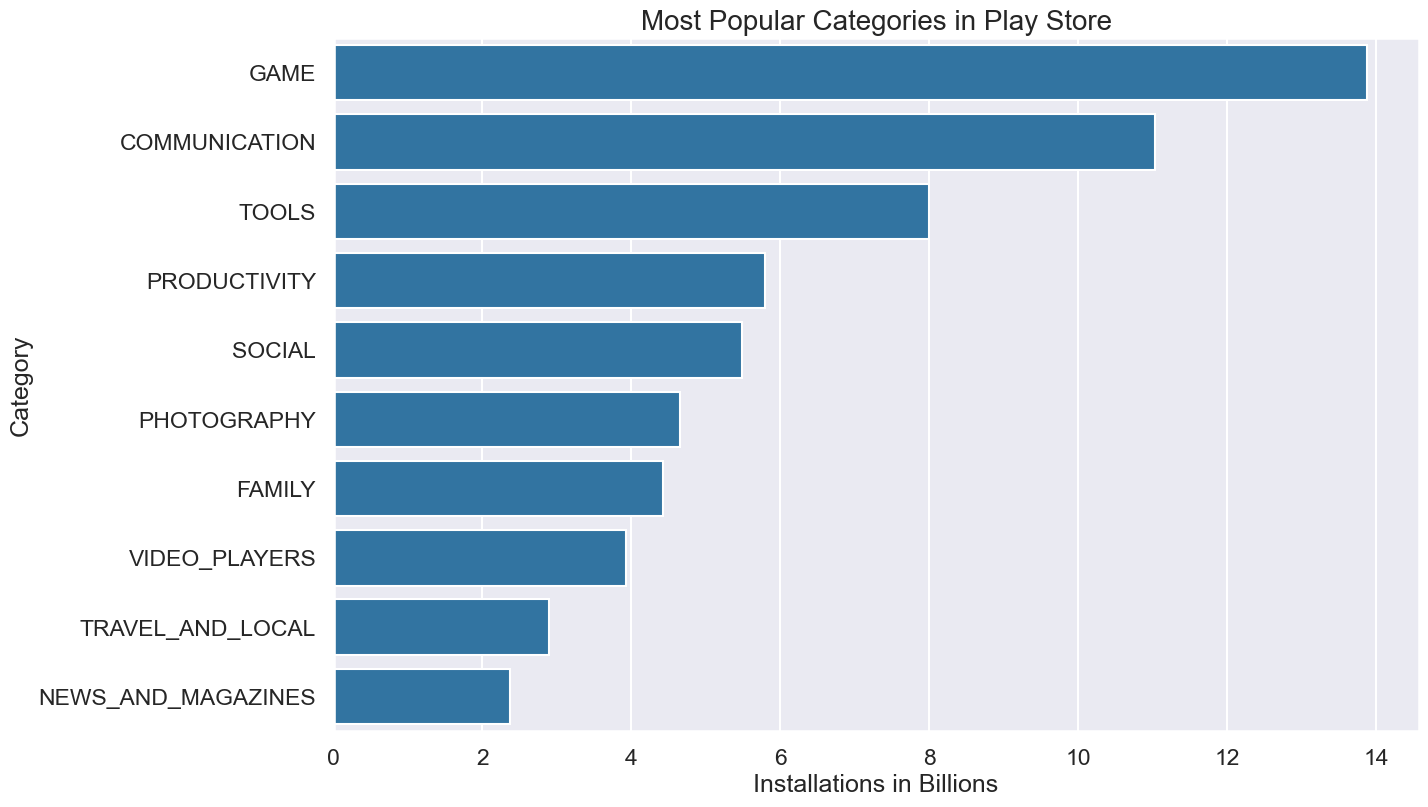

In [323]:
df_cate_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_cate_installs.Installs = df_cate_installs.Installs/1000000000 #Converting into billions
df2 = df_cate_installs.head(10)
plt.figure(figsize=(14,9))
sns.set_context('talk')
sns.set_style('darkgrid')

sns.barplot(x='Installs', y='Category', data=df2,)
plt.xlabel('Installations in Billions')
plt.title("Most Popular Categories in Play Store", size = 20)

## Insights 
- Out of all the categories "GAME" has the most number of Installations

## How many apps are there on Google Play Store which get 5 ratings??

In [325]:
top_rated = df_copy.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending=False).reset_index()

toprated_app = top_rated[top_rated.Rating == 5.0]
print("Number of 5 rated apps",toprated_app.shape[0])
toprated_app.head(1)


Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000.0,CS & IT Interview Questions,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category

In [326]:
df_copy.to_csv('Data/google_cleaned.csv')